<a href="https://colab.research.google.com/github/kzielins/ML_courses/blob/main/neural-network/Tensorflow%20Neural%20Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

In this example the input is just 1-D tensor. The two values could be something like leaf size and leaf width.

In [ ]:
x = tf.Variable([[1.,2.]])
x.shape

TensorShape([1, 2])

Label (y) is 5. The goal is to make a model that can map from x to y. This could be for example an index of maple. In that case the model could predict tree when leaf size and width given.

In [ ]:
y = 5.

In [ ]:
def initalize_parameters(size, variance=1.0):
    return tf.Variable((tf.random.normal(size) * variance))

In [ ]:
first_layer_output_size = 3

Parameteres are changed to make the predictions closer to the real values.

In [ ]:
weights_1 = initalize_parameters((x.shape[1], first_layer_output_size))
weights_1

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[ 1.6579958 ,  2.0620756 , -0.5536627 ],
       [ 0.5561175 ,  0.52956486,  0.920679  ]], dtype=float32)>

In [ ]:
bias_1 = initalize_parameters([1])
bias_1

<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([1.6338966], dtype=float32)>

In [ ]:
weights_2 = initalize_parameters((first_layer_output_size,1))
weights_2

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[ 0.18695632],
       [-0.15468878],
       [-1.6442192 ]], dtype=float32)>

In [ ]:
bias_2 = initalize_parameters([1])
bias_2

<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.24501882], dtype=float32)>

Neural network consists from **at least** two linear layer and non-linear layer between them. In linear layer weights are multiplied by x and then bias is added to that result.

In [ ]:
def simple_neural_network(xb):
    # linear
    l1 = xb @ weights_1 + bias_1
    # non-linear
    l2 = tf.math.maximum(l1, tf.Variable([0.]))
    # linear
    l3 = l2 @ weights_2 + bias_2
    return l3

Loss measures the difference between predictions and real values.

In [ ]:
def loss_func(preds, yb):
    # Mean Squared Error (MSE)
    return tf.math.reduce_mean((preds-yb)**2)

Learning rate makes sure gradient can't modify parameters too much once.

In [ ]:
lr = tf.constant([10E-4])

Every loop contains three simple steps:
1. Make prediction
2. Calculate how good the prediction was compared to the real value
    - When calculating loss it automatically calculates gradient so we don't need to think about it
3. Update parameters by subtracting gradient times learning rate

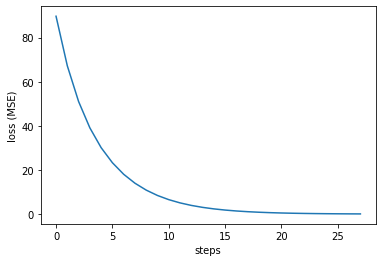

In [ ]:
losses = []

while(len(losses) == 0 or losses[-1] > 0.1):
    with tf.GradientTape() as tape:
        preds = simple_neural_network(x)
        loss = loss_func(preds, y)
    dW1, db1, dW2, db2 = tape.gradient(loss, [weights_1, bias_1, weights_2, bias_2])
    
    weights_1.assign_sub(dW1 * lr)
    bias_1.assign_sub(db1 * lr)
    
    weights_2.assign_sub(dW2 * lr)
    bias_2.assign_sub(db2 * lr)
    
    losses.append(loss)
    
plt.plot(list(range(len(losses))), losses)
plt.ylabel('loss (MSE)')
plt.xlabel('steps')
plt.show()